# 이진 탐색 알고리즘
- 순차 탐색: 리스트 안에 있는 특정한 데이터를 찾기 위하여 **앞에서부터 데이터를 하나씩 확인**하는 방법 eg) 선택 정렬
- 이진 탐색: **정렬되어 있는 리스트**에서 탐색 범위를 절반씩 좁혀가며 데이터를 탐색하는 방법
    - 이진 탐색은 시작점, 끝점, 중간점을 이용하여 탐색 범위를 설정

### 이미 정렬된 10개의 데이터 중에서 값이 4인 원소를 찾는 예시
- [Step 1] 시작점 idx: 0, 끝점 idx: 9, 중간점 idx: 4 (소수점 이하 제거)
    - 중간점의 값 8과 찾고자 하는 값 4를 비교하여, 중간점 값이 더 크므로 중간점을 포함한 오른쪽 데이터는 모두 버림
  
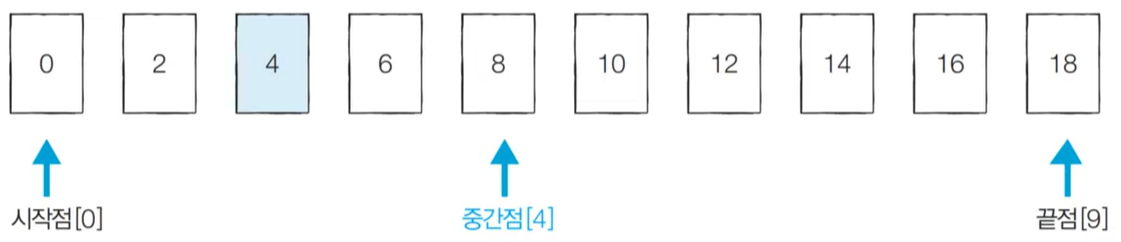  
  
  
- [Step 2] 시작점 idx: 0, 끝점 idx: 3, 중간점 idx: 1 (소수점 이하 제거)
    - 중간점의 값 2와 찾고자 하는 값 4를 비교하여, 중간점 값이 더 작으므로 중간점을 포함한 왼쪽 데이터는 모두 버림  
  
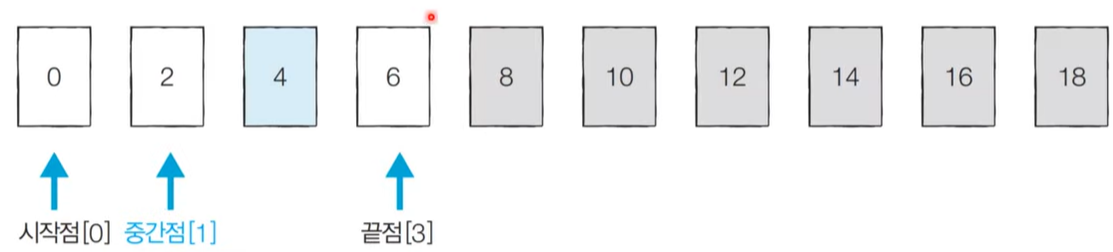  
    
    
- [Step 3] 시작점 idx: 2, 끝점 idx: 3, 중간점 idx: 2 (소수점 이하 제거)  
  
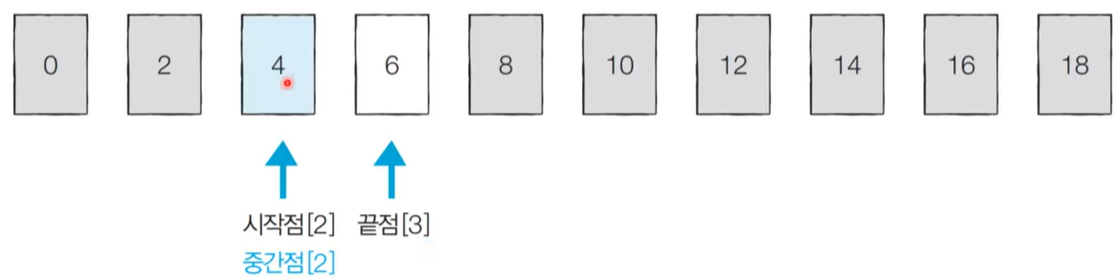  
  
찾고자 하는 값 4와 중간점의 값 4가 동일하므로 반복 종료 + 찾고자 하는 값의 인덱스는 2

## 이진 탐색의 시간 복잡도: $O(\log{N})$
- 단계마다 탐색 범위를 2로 나눈 것과 동일하므로 연산 횟수는 $\log_2{N}$에 비례
- 예를 들어 초기 데이터 개수가 32개일 때, 이상적으로 1단계를 거치면 16개 가량의 데이터만 남는다.
    - 2단계를 거치면 8개 가량의 데이터가 남는다.
    - 3단계를 거치면 4개 가량의 데이터만 남는다.
- 다시 말해, 이진 탐색은 탐색 범위를 절반씩 줄이며, 시간 복잡도는 $O(\log{N})$을 보장

### 코드 작성1: 재귀함수 활용

In [1]:
def binary_search(array, target, start, end):
    # 원소가 없는 경우: start가 end보다 커지는 경우 탐색 범위 모두 진행함
    if start > end:
        return None
    
    mid = (start + end) // 2   # 중간점 idx
    
    # 찾은 경우 중간점 idx 반환 (target == array[중간점 idx])
    if target == array[mid]:
        return mid
    
    # 중간점의 값이 target보다 큰 경우 오른쪽 버리기
    if target < array[mid]:
        return binary_search(array, target, start, mid-1)
    
    # 중간점의 값이 target보다 작은 경우 왼쪽 버리기
    if target > array[mid]:
        return binary_search(array, target, mid+1, end)

In [2]:
# example:
# 원소의 개수 n과 찾고자 하는 값 target을 입력 받기
n, target = map(int, input().split())

# 전체 원소 입력 받기
array = list(map(int, input().split()))

# 이진 탐색 수행 결과 출력
result = binary_search(array, target, 0, n-1)

if result == None:
    print('원소가 존재하지 않습니다.')
else:
    print(f'원소의 위치: {result+1}')

10 7
1 3 5 7 9 11 13 15 17 19
원소의 위치: 4


### 코드작성2: 반복문 활용

In [3]:
def binary_search2(array, target, start, end):
    while start <= end:
        mid = (start + end) // 2
        
        if target == array[mid]:
            return mid
        
        elif target < array[mid]:
            end = mid - 1
            
        else:
            start = mid + 1
            
    # 반복을 모두 해도 안끝난다면
    return None

In [5]:
# example:
# 원소의 개수 n과 찾고자 하는 값 target을 입력 받기
n, target = map(int, input().split())

# 전체 원소 입력 받기
array = list(map(int, input().split()))

# 이진 탐색 수행 결과 출력
result = binary_search2(array, target, 0, n-1)

if result == None:
    print('원소가 존재하지 않습니다.')
else:
    print(f'원소의 위치: {result+1}')

10 7
1 3 5 7 9 11 13 15 17 19
원소의 위치: 4


## 파이썬 이진 탐색 라이브러리
- `bisect_left(a, x)`: 정렬된 순서를 유지하면서 배열 a에 x를 삽입할 가장 왼쪽 인덱스 반환
- `bisect_rihgt(a, x)`: 정렬된 순서를 유지하면서 배열 a에 x를 삽입할 가장 오른쪽 인덱스 반환  
  
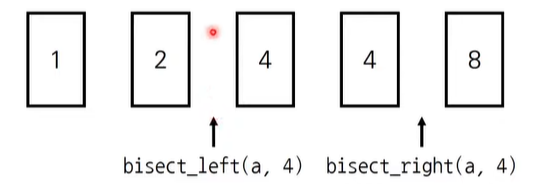

In [6]:
from bisect import bisect_left, bisect_right

a = [1, 2, 4, 4, 8]
x = 4

print(bisect_left(a, x))
print(bisect_right(a, x))

2
4


## 값이 특정 범위에 속하는 데이터 개수 구하기

In [11]:
from bisect import bisect_left, bisect_right

# 값이 [left_value, right_value]인 데이터 개수를 반환한는 함수

def count_by_range(a, left_value, right_value):
    right_idx = bisect_right(a, right_value)
    left_idx = bisect_left(a, left_value)
    return right_idx - left_idx

# array 선언
a = [1, 2, 3, 3, 3, 3, 4, 4, 8, 9]

# 값이 4인 데이터 개수 출력
print(count_by_range(a, 4, 4))

# 값이 [-1, 3] 범위에 있는 데이터 개수 출력
print(count_by_range(a, -1, 3))

2
6
2
6


## 파라메트릭 서치 (Parametric Search)
- **파라메트릭 서치**란 최적화 문제를 결정 문제('예' 혹은 '아니오')로 바꾸어 해결하는 기법
    - 예시: 특정한 조건을 만족하는 가장 알맞은 값을 빠르게 찾는 최적화 문제
- 일반적으로 코딩 테스트에서 **파라메트릭 서치 문제는 이진 탐색을 이용하여 해결** 가능

### <문제> 떡볶이 떡 만들기: 문제 설명
- 오늘 해성이는 여행 가신 부모님을 대신해서 떡집 일을 하기로 했습니다. 오늘은 떡볶이 떡을 만드는 날입니다. 해성이네 떡볶이 떡은 재밌게도 떡볶이 떡의 길이가 일정하지 않습니다. 대신에 한 봉지에 들어가는 떡의 총 길이는 절단기로 잘라서 맞춰줍니다.
- 절단기에 **높이(H)**를 지정하면 줄지어진 떡을 한 번에 절단합니다. 높이가 H보다 긴 떡은 H 위의 부분이 잘릴 것이고, 낮은 떡은 잘라지지 않습니다.
- 예를 들어, 높이가 19, 14, 10, 17cm인 떡이 나란히 있고, 절단기 높이를 15cm로 지정하면 자른 뒤 떡의 높이는 15, 14, 10, 15cm가 될 것입니다. 잘린 떡의 길이는 차례대로 4, 0, 0, 2cm 입니다. 손님은 6cm 만큼의 길이를 가져갑니다.
- 손님이 왔을 때 요청한 길이가 M일 때, **적어도 M만큼의 떡을 얻기 위해 절단기에 설정할 수 있는 높이의 최댓값을 구하는 프로그램**을 작성하세요.  
  
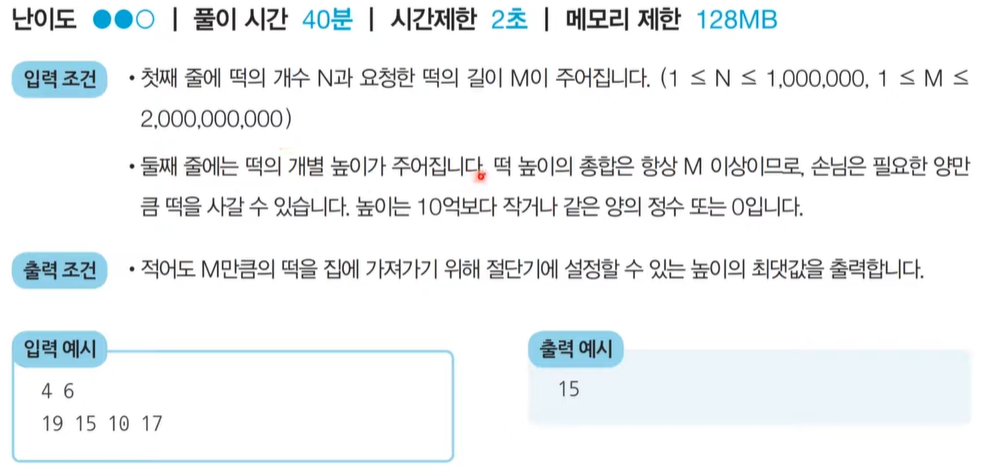

In [55]:
n, m = map(int, input().split())
array = list(map(int, input().split()))

from bisect import bisect_right
array.sort()
result = []
height = []
for h in range(min(array), max(array)):
    rest = []
    for a in array:
        if a > h:
            rest.append(a-h)
        else:
            rest.append(0)

    result.append(sum(rest))
    height.append(h)
    
for i in range(len(result)-1, 0, -1):
    if result[i] >= m:
        break
answer = height[i]

print(answer)

4 6
19 15 10 17
15


### 해설
- 적절한 높이를 찾을 때까지 이진 탐색을 수행하여 높이 H를 반복적으로 조정하면 된다.
- "현재 이 높이로 자르면 조건을 만족할 수 있는가"를 확인한 뒤에 **조건의 만족 여부('예' 혹은 '아니요')에 따라서 탐색 범위를 좁혀서 해결**할 수 있다.
- 절단기의 높이는 0부터 10억까지의 정수 중 하나
    - 이렇게 큰 탐색 범위를 보면 가장 먼저 이진 탐색을 떠올려야 한다.
    
- 문제에서 제시된 예시를 통해 그림으로 이해해보자.

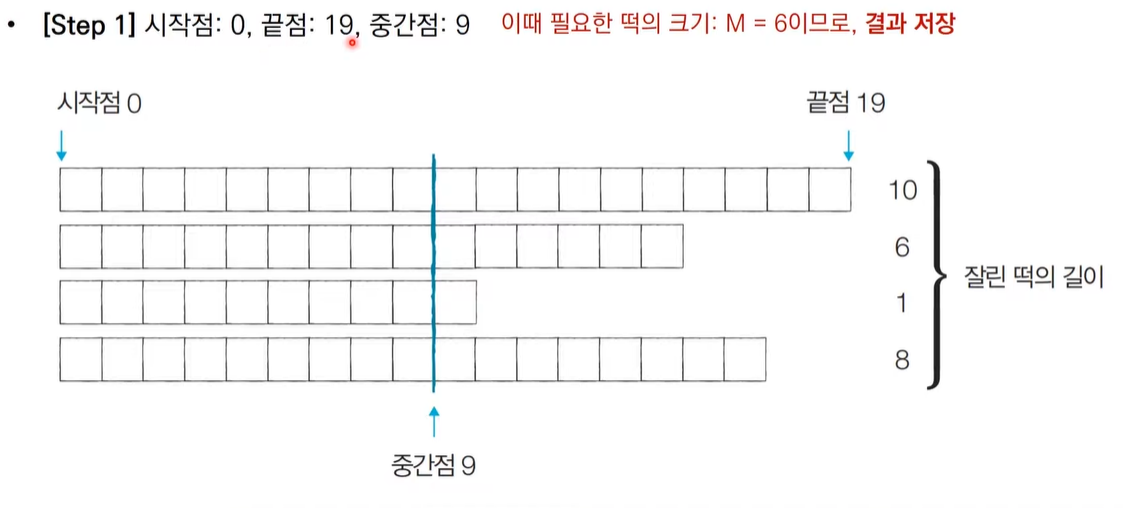  
  
- 이때, 잘린 떡의 길이의 합이 25cm로 필요한 떡의 크기 M=6보다 크므로 중간점 9는 만족한다. 따라서, 중간점 9+1을 시작점으로 다시 설정하여 이진 탐색을 수행한다.

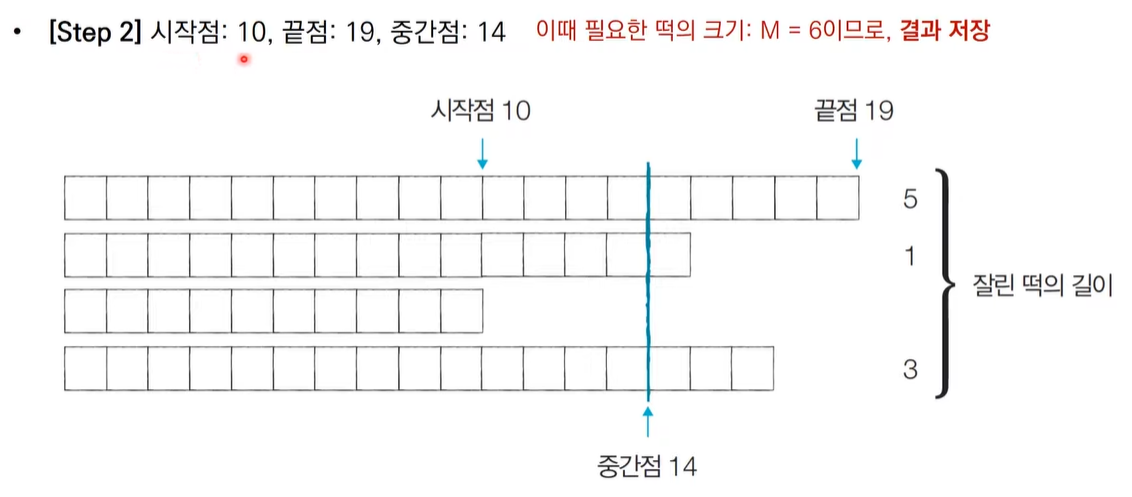

In [61]:
n, m = map(int, input().split())
array = list(map(int, input().split()))

4 6
19 15 10 17


In [62]:
array

[19, 15, 10, 17]

In [74]:
start = 0
end = max(array)

# 이진 탐색
result = 0
while start <= end:
    total = 0
    mid = (start + end) // 2
    
    for a in array:
        if a > mid:
            total += a-mid
    
    if total < m:
        end = mid - 1
    else:
        result = mid
        start = mid + 1
        
print(result)

15
